In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\pbari\Downloads\2nd project\dataset2\final_df.csv")

In [3]:
df.head()

,DATE/TIME,UNIT1-INV1-POWER,UNIT1-INV2-POWER,UNIT2-INV1-POWER,UNIT2-INV2-POWER,GII,MODULE TEMP.1,RAIN,AMBIENT TEMPRETURE
0,01-04-2024 06:18,74.400002,73.099998,83.300003,85.199997,25,19.0,0.0,22.700001
1,01-04-2024 06:19,83.500000,81.599998,87.599998,90.099998,27,19.0,0.0,22.700001
2,01-04-2024 06:20,88.400002,86.500000,92.199997,95.000000,29,19.0,0.0,22.700001
3,01-04-2024 06:21,93.500000,91.400002,97.000000,100.099998,31,19.1,0.0,22.700001
4,01-04-2024 06:22,98.500000,96.400002,101.900002,105.000000,33,19.1,0.0,22.600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68451 entries, 0 to 68450
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE/TIME           68451 non-null  object 
 1   UNIT1-INV1-POWER    68451 non-null  float64
 2   UNIT1-INV2-POWER    68451 non-null  float64
 3   UNIT2-INV1-POWER    68451 non-null  float64
 4   UNIT2-INV2-POWER    68451 non-null  float64
 5   GII                 68451 non-null  int64  
 6   MODULE TEMP.1       68451 non-null  float64
 7   RAIN                68451 non-null  float64
 8   AMBIENT TEMPRETURE  68451 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.7+ MB


In [5]:
df.columns

Index(['DATE/TIME', 'UNIT1-INV1-POWER', 'UNIT1-INV2-POWER', 'UNIT2-INV1-POWER',
       'UNIT2-INV2-POWER', 'GII', 'MODULE TEMP.1', 'RAIN',
       'AMBIENT TEMPRETURE'],
      dtype='object')

Check Data Types

In [7]:
df.dtypes

DATE/TIME              object
UNIT1-INV1-POWER      float64
UNIT1-INV2-POWER      float64
UNIT2-INV1-POWER      float64
UNIT2-INV2-POWER      float64
GII                     int64
MODULE TEMP.1         float64
RAIN                  float64
AMBIENT TEMPRETURE    float64
dtype: object

Handling Duplicate

In [9]:
df.duplicated().sum()

0

Missing Value

In [11]:
df.isnull().sum()

DATE/TIME             0
UNIT1-INV1-POWER      0
UNIT1-INV2-POWER      0
UNIT2-INV1-POWER      0
UNIT2-INV2-POWER      0
GII                   0
MODULE TEMP.1         0
RAIN                  0
AMBIENT TEMPRETURE    0
dtype: int64

Outlier Treatment

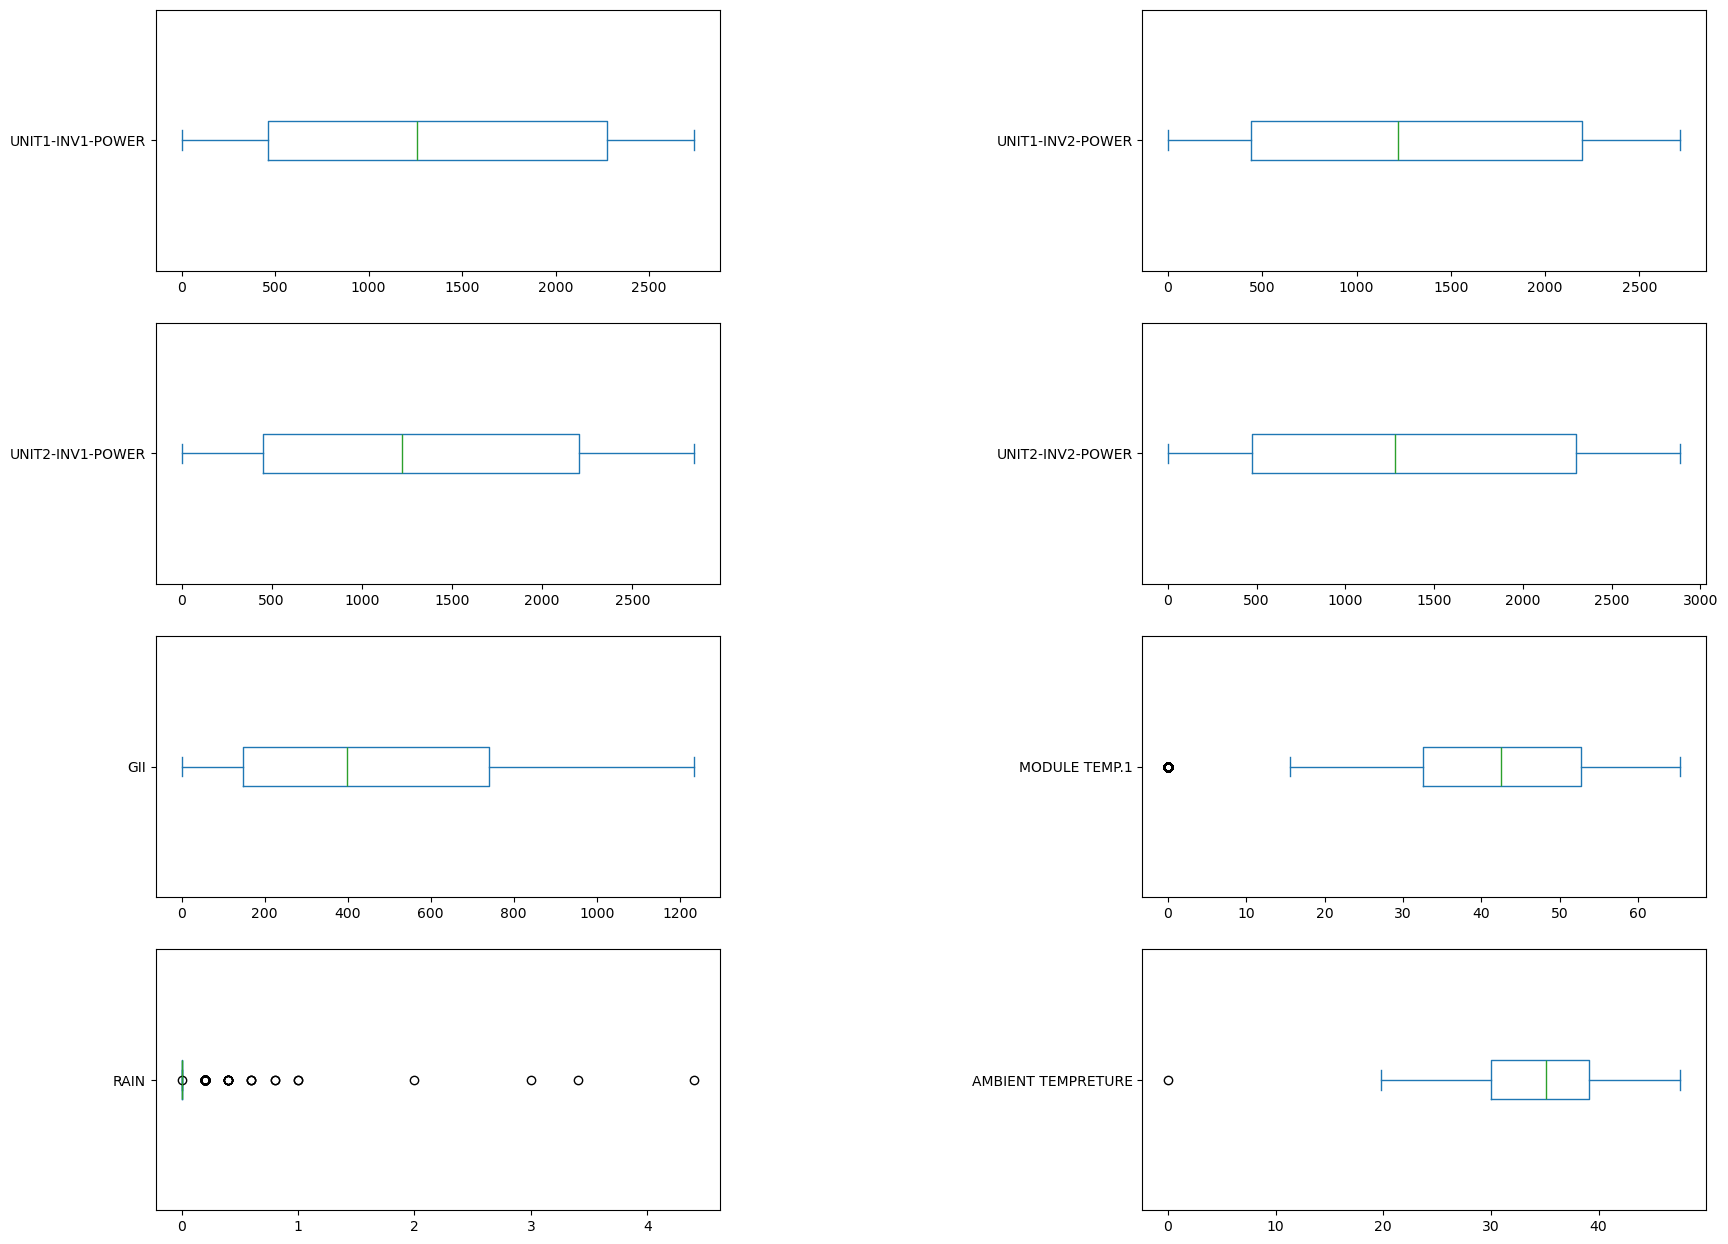

In [13]:
df.plot(kind="box",sharey=False,sharex=False,subplots=True,figsize=(20,40),layout=[10,2],vert=0)
plt.subplots_adjust(wspace=0.75)

In [14]:
df.columns

Index(['DATE/TIME', 'UNIT1-INV1-POWER', 'UNIT1-INV2-POWER', 'UNIT2-INV1-POWER',
       'UNIT2-INV2-POWER', 'GII', 'MODULE TEMP.1', 'RAIN',
       'AMBIENT TEMPRETURE'],
      dtype='object')

MODULE TEMP.1

<Axes: ylabel='MODULE TEMP.1'>

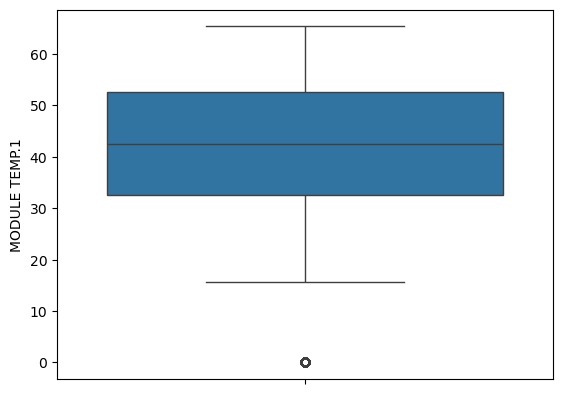

In [16]:
sns.boxplot(df['MODULE TEMP.1'])

In [17]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [18]:
from feature_engine.outliers import Winsorizer

win_df = Winsorizer(capping_method='iqr',
                   fold=1.5,
                   tail='both',
                   variables=['MODULE TEMP.1'])

In [19]:
df=win_df.fit_transform(df)

<Axes: ylabel='MODULE TEMP.1'>

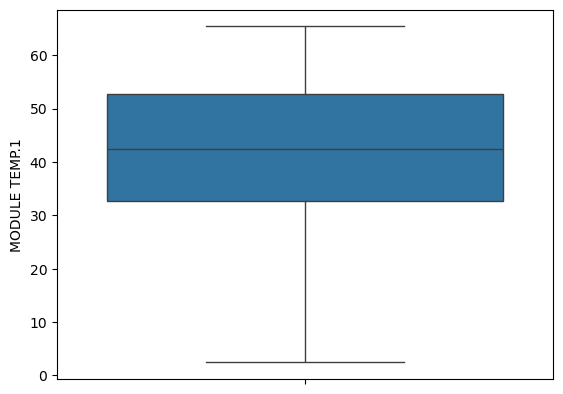

In [20]:
sns.boxplot(df['MODULE TEMP.1'])

RAIN

<Axes: ylabel='RAIN'>

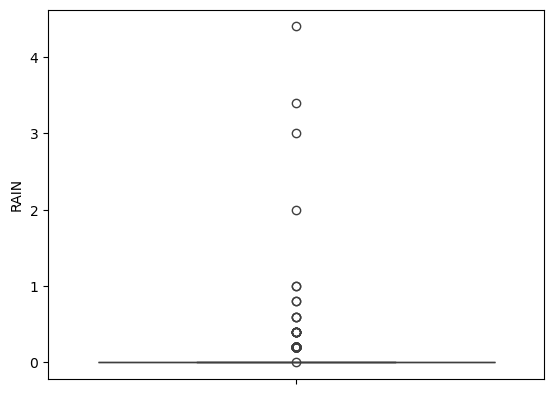

In [22]:
sns.boxplot(df['RAIN'])

In [23]:
from scipy import stats

df = df[(abs(stats.zscore(df["RAIN"])) < 3)]

<Axes: ylabel='RAIN'>

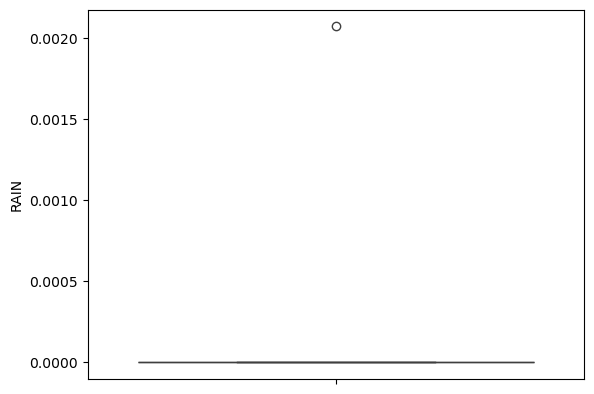

In [24]:
sns.boxplot(df['RAIN'])

In [25]:
Q1 = df["RAIN"].quantile(0.25)
Q3 = df["RAIN"].quantile(0.75)
IQR = Q3 - Q1

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
df = df[(df["RAIN"] >= lower_bound) & (df["RAIN"] <= upper_bound)]

<Axes: ylabel='RAIN'>

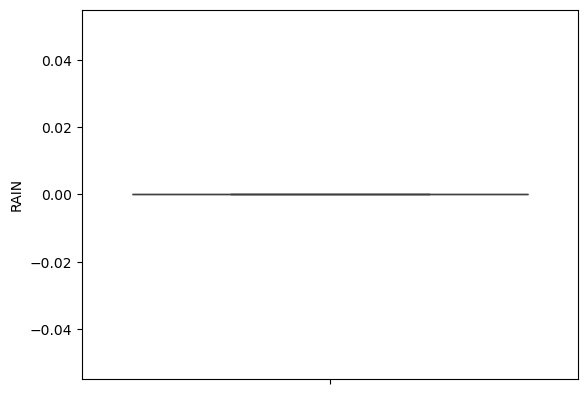

In [28]:
sns.boxplot(df['RAIN'])

AMBIENT TEMPRETURE

<Axes: ylabel='AMBIENT TEMPRETURE'>

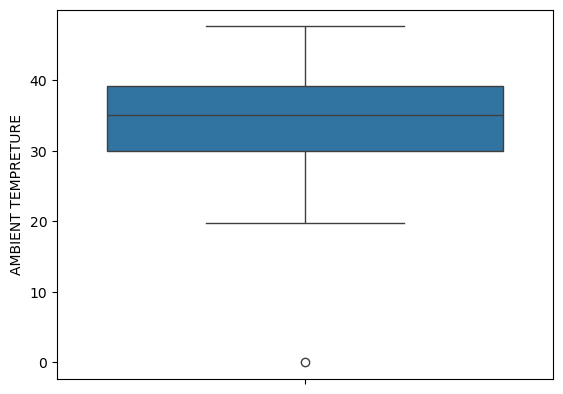

In [30]:
sns.boxplot(df['AMBIENT TEMPRETURE'])

In [31]:
from feature_engine.outliers import Winsorizer

win_df=Winsorizer(capping_method='iqr',
                 fold=1.5,
                 tail='both',
                 variables=['AMBIENT TEMPRETURE'])

In [32]:
df=win_df.fit_transform(df)

<Axes: ylabel='AMBIENT TEMPRETURE'>

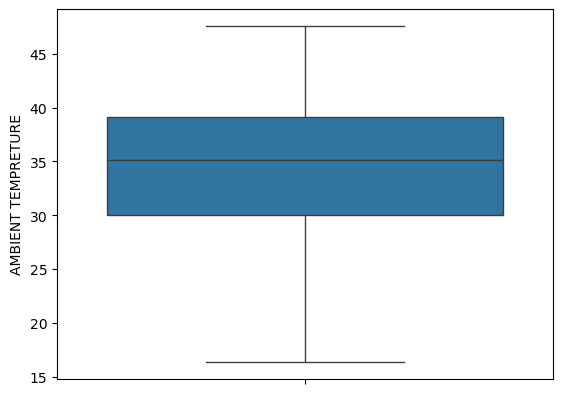

In [33]:
sns.boxplot(df['AMBIENT TEMPRETURE'])

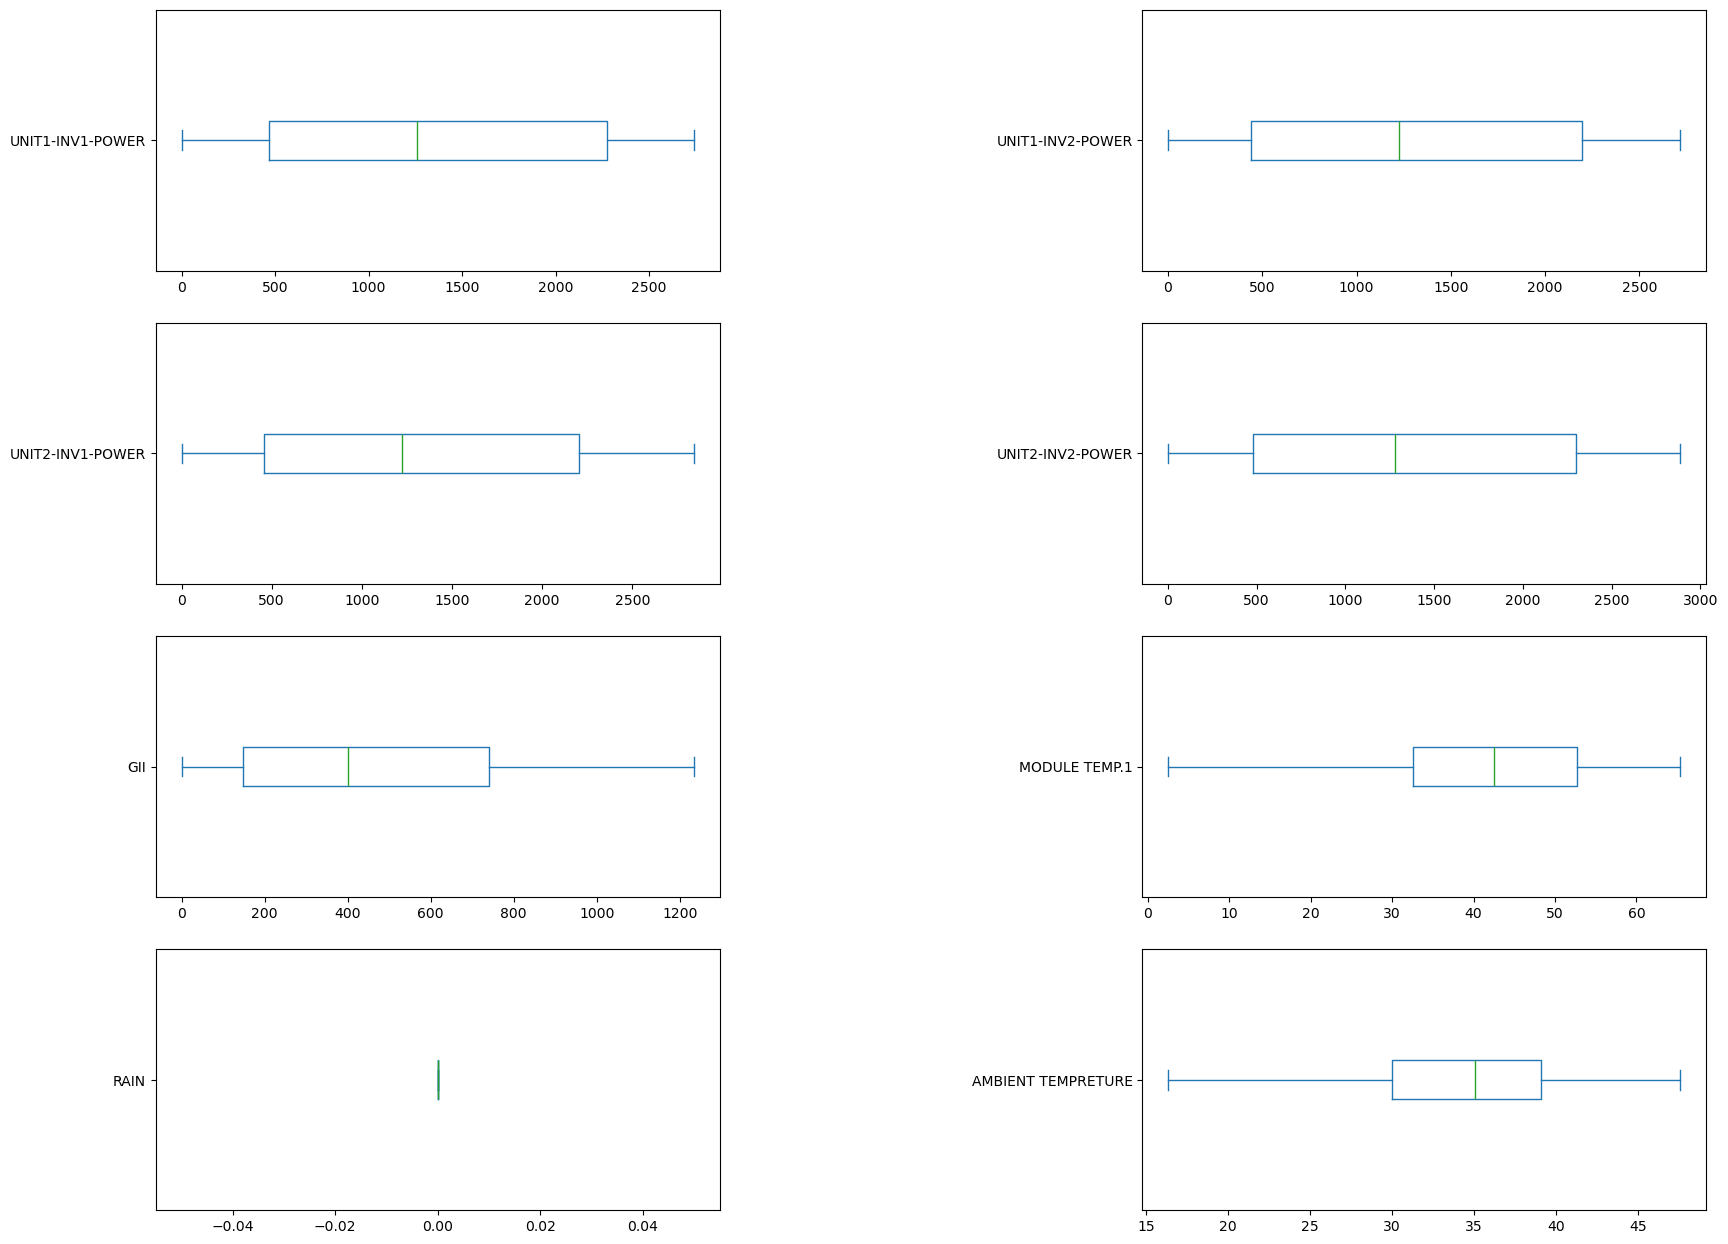

In [34]:
df.plot(kind="box",sharey=False,sharex=False,subplots=True,figsize=(20,40),layout=[10,2],vert=0)
plt.subplots_adjust(wspace=0.75)

In [35]:
df.head()

,DATE/TIME,UNIT1-INV1-POWER,UNIT1-INV2-POWER,UNIT2-INV1-POWER,UNIT2-INV2-POWER,GII,MODULE TEMP.1,RAIN,AMBIENT TEMPRETURE
0,01-04-2024 06:18,74.400002,73.099998,83.300003,85.199997,25,19.0,0.0,22.700001
1,01-04-2024 06:19,83.500000,81.599998,87.599998,90.099998,27,19.0,0.0,22.700001
2,01-04-2024 06:20,88.400002,86.500000,92.199997,95.000000,29,19.0,0.0,22.700001
3,01-04-2024 06:21,93.500000,91.400002,97.000000,100.099998,31,19.1,0.0,22.700001
4,01-04-2024 06:22,98.500000,96.400002,101.900002,105.000000,33,19.1,0.0,22.600000


Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = [
    'UNIT1-INV1-POWER', 'UNIT1-INV2-POWER', 'UNIT2-INV1-POWER', 
    'UNIT2-INV2-POWER', 'GII', 'MODULE TEMP.1', 
    'RAIN', 'AMBIENT TEMPRETURE'
]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df)

              DATE/TIME  UNIT1-INV1-POWER  UNIT1-INV2-POWER  UNIT2-INV1-POWER  \
0      01-04-2024 06:18          0.027155          0.026901          0.029308   
1      01-04-2024 06:19          0.030477          0.030029          0.030821   
2      01-04-2024 06:20          0.032265          0.031832          0.032440   
3      01-04-2024 06:21          0.034127          0.033635          0.034128   
4      01-04-2024 06:22          0.035952          0.035475          0.035853   
...                 ...               ...               ...               ...   
68446  30-06-2024 18:06          0.000000          0.000000          0.007389   
68447  30-06-2024 18:07          0.000000          0.000000          0.007072   
68448  30-06-2024 18:08          0.000000          0.000000          0.006650   
68449  30-06-2024 18:09          0.000000          0.000000          0.006192   
68450  30-06-2024 18:10          0.000000          0.000000          0.005700   

       UNIT2-INV2-POWER    

In [38]:
df.head()

,DATE/TIME,UNIT1-INV1-POWER,UNIT1-INV2-POWER,UNIT2-INV1-POWER,UNIT2-INV2-POWER,GII,MODULE TEMP.1,RAIN,AMBIENT TEMPRETURE
0,01-04-2024 06:18,0.027155,0.026901,0.029308,0.029512,0.020259,0.262907,0.0,0.2032
1,01-04-2024 06:19,0.030477,0.030029,0.030821,0.031209,0.021880,0.262907,0.0,0.2032
2,01-04-2024 06:20,0.032265,0.031832,0.032440,0.032906,0.023501,0.262907,0.0,0.2032
3,01-04-2024 06:21,0.034127,0.033635,0.034128,0.034673,0.025122,0.264496,0.0,0.2032
4,01-04-2024 06:22,0.035952,0.035475,0.035853,0.036370,0.026742,0.264496,0.0,0.2000


check Histogram

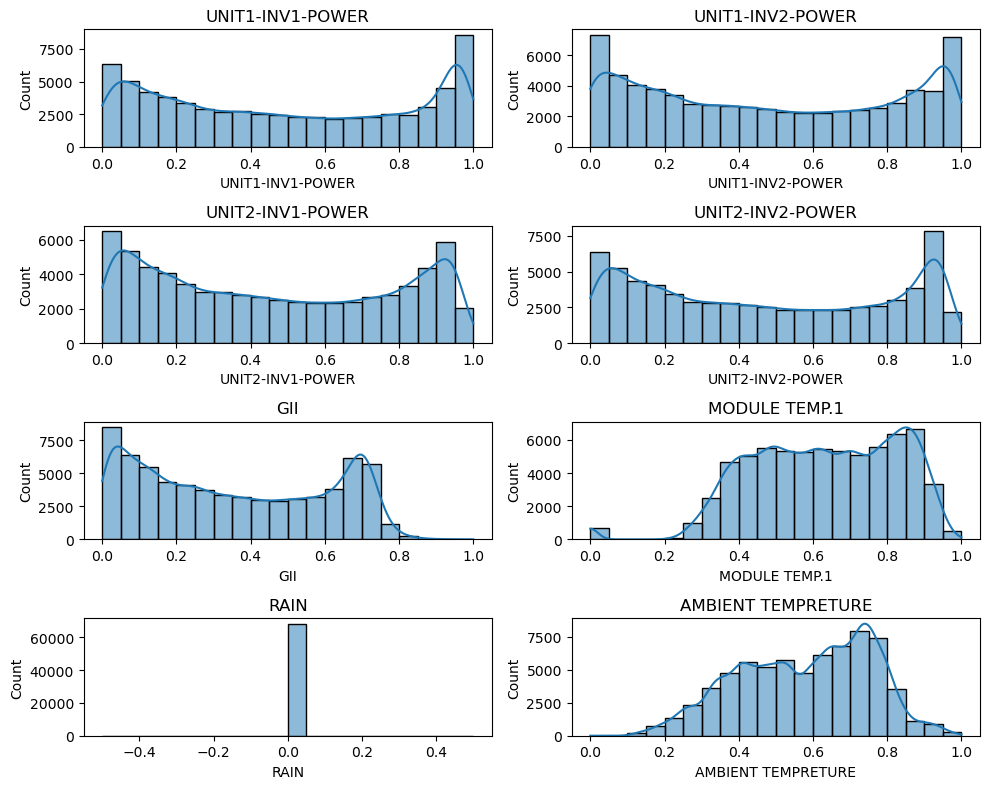

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns you want to plot
columns = ['UNIT1-INV1-POWER', 'UNIT1-INV2-POWER', 'UNIT2-INV1-POWER', 'UNIT2-INV2-POWER', 'GII', 'MODULE TEMP.1', 'RAIN', 'AMBIENT TEMPRETURE']

# Set up the figure size
plt.figure(figsize=(10, 8))

# Loop through each column to plot both histogram and KDE
for i, col in enumerate(columns):
    plt.subplot(4, 2, i+1)  # Adjust subplot grid based on the number of columns
    sns.histplot(df[col], bins=20, kde=True)  # kde=True adds the Kernel Density Estimate
    plt.title(col)

# Adjust layout
plt.tight_layout()
plt.show()

# UNIT1-INV1-POWER

First Moment Business Decision (Mean, Median, Mode)

In [95]:
# Mean

In [97]:
mean = df['UNIT1-INV1-POWER'].mean()
print(mean)

0.48992107065153906


In [99]:
# Median

In [101]:
median = df['UNIT1-INV1-POWER'].median()
print(median)

0.4595955648148834


In [103]:
# Mode

In [105]:
mode = df['UNIT1-INV1-POWER'].mode()
print(mode)

0    0.0
Name: UNIT1-INV1-POWER, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [139]:
# Variance

In [141]:
UNIT1_INV1_POWER_variance = df['UNIT1-INV1-POWER'].var()
print("Variance of UNIT1-INV1-POWER:", UNIT1_INV1_POWER_variance)

Variance of UNIT1-INV1-POWER: 0.11305546901052581


In [143]:
# Standard

In [145]:
UNIT1_INV1_POWER_stddev = df['UNIT1-INV1-POWER'].std()
print("Standard Deviation of UNIT1-INV1-POWER:", UNIT1_INV1_POWER_stddev)

Standard Deviation of UNIT1-INV1-POWER: 0.3362372213341732


In [147]:
# Range

In [149]:
UNIT1_INV1_POWER_range = df['UNIT1-INV1-POWER'].max() - df['UNIT1-INV1-POWER'].min()
print("Range of UNIT1-INV1-POWER):", UNIT1_INV1_POWER_range)

Range of UNIT1-INV1-POWER): 1.0


Third Moment Business Decision (Skewness)

In [153]:
# skewness

In [155]:
skewness = df['UNIT1-INV1-POWER'].skew()
print(skewness)

0.09405715856579852


Fourth Moment Business Decision (Kurtosis)

In [159]:
# Kurtosis

In [161]:
kurtosis = df['UNIT1-INV1-POWER'].kurtosis()
print(kurtosis)

-1.461699237072652


# UNIT1-INV2-POWER

First Moment Business Decision (Mean, Median, Mode)

In [166]:
# Mean

In [168]:
mean = df['UNIT1-INV2-POWER'].mean()
print(mean)

0.47790838236748345


In [170]:
# Median

In [172]:
median = df['UNIT1-INV2-POWER'].median()
print(median)

0.44995215834816793


In [174]:
# Mode

In [190]:
mode = df['UNIT1-INV2-POWER'].mode()
print(mode)

0    0.0
Name: UNIT1-INV2-POWER, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [194]:
# Variance

In [196]:
UNIT1_INV2_POWER_variance = df['UNIT1-INV2-POWER'].var()
print("Variance of UNIT1-INV2-POWER:", UNIT1_INV2_POWER_variance)

Variance of UNIT1-INV2-POWER: 0.11110157378855684


In [198]:
# Standard

In [200]:
UNIT1_INV2_POWER_stddev = df['UNIT1-INV2-POWER'].std()
print("Standard Deviation of UNIT1-INV2-POWER:", UNIT1_INV2_POWER_stddev)

Standard Deviation of UNIT1-INV2-POWER: 0.333319027042497


In [202]:
# Range

In [204]:
UNIT1_INV2_POWER_range = df['UNIT1-INV2-POWER'].max() - df['UNIT1-INV2-POWER'].min()
print("Range of UNIT1-INV2-POWER):", UNIT1_INV2_POWER_range)

Range of UNIT1-INV2-POWER): 1.0


Third Moment Business Decision (Skewness)

In [208]:
# skewness

In [210]:
skewness = df['UNIT1-INV2-POWER'].skew()
print(skewness)

0.10013201598960185


Fourth Moment Business Decision (Kurtosis)

In [214]:
# Kurtosis

In [216]:
kurtosis = df['UNIT1-INV2-POWER'].kurtosis()
print(kurtosis)

-1.4386420489301985


# UNIT2-INV1-POWER

First Moment Business Decision (Mean, Median, Mode)

In [221]:
# Mean

In [223]:
mean = df['UNIT2-INV1-POWER'].mean()
print(mean)

0.46236123353602115


In [225]:
# Median

In [227]:
median = df['UNIT2-INV1-POWER'].median()
print(median)

0.4310393347128729


In [229]:
# Mode

In [231]:
mode = df['UNIT2-INV1-POWER'].mode()
print(mode)

0    0.0
Name: UNIT2-INV1-POWER, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [235]:
# Variance

In [237]:
UNIT2_INV1_POWER_variance = df['UNIT2-INV1-POWER'].var()
print("Variance of UNIT2-INV1-POWER:", UNIT2_INV1_POWER_variance)

Variance of UNIT2-INV1-POWER: 0.10169058212722075


In [239]:
# Standard

In [241]:
UNIT2_INV1_POWER_stddev = df['UNIT2-INV1-POWER'].std()
print("Standard Deviation of UNIT2-INV1-POWER:", UNIT2_INV1_POWER_stddev)

Standard Deviation of UNIT2-INV1-POWER: 0.3188896080577427


In [243]:
# Range

In [245]:
UNIT2_INV1_POWER_range = df['UNIT2-INV1-POWER'].max() - df['UNIT2-INV1-POWER'].min()
print("Range of UNIT2-INV1-POWER):", UNIT2_INV1_POWER_range)

Range of UNIT2-INV1-POWER): 1.0


Third Moment Business Decision (Skewness)

In [249]:
# skewness

In [251]:
skewness = df['UNIT2-INV1-POWER'].skew()
print(skewness)

0.13249025853164115


Fourth Moment Business Decision (Kurtosis)

In [255]:
# Kurtosis

In [257]:
kurtosis = df['UNIT2-INV1-POWER'].kurtosis()
print(kurtosis)

-1.4249598849824747


# UNIT2-INV2-POWER

First Moment Business Decision (Mean, Median, Mode)

In [264]:
# Mean

In [266]:
mean = df['UNIT2-INV2-POWER'].mean()
print(mean)

0.47258426964647726


In [268]:
# Median

In [270]:
median = df['UNIT2-INV2-POWER'].median()
print(median)

0.4432975576723242


In [272]:
# Mode

In [274]:
mode = df['UNIT2-INV2-POWER'].mode()
print(mode)

0    0.0
Name: UNIT2-INV2-POWER, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [280]:
# Variance

In [282]:
UNIT2_INV2_POWER_variance = df['UNIT2-INV2-POWER'].var()
print("Variance of UNIT2-INV2-POWER:", UNIT2_INV2_POWER_variance)

Variance of UNIT2-INV2-POWER: 0.10476762096808523


In [284]:
# Standard

In [286]:
UNIT2_INV2_POWER_stddev = df['UNIT2-INV2-POWER'].std()
print("Standard Deviation of UNIT2-INV2-POWER:", UNIT2_INV2_POWER_stddev)

Standard Deviation of UNIT2-INV2-POWER: 0.3236782676796285


In [288]:
# Range

In [290]:
UNIT2_INV2_POWER_range = df['UNIT2-INV2-POWER'].max() - df['UNIT2-INV2-POWER'].min()
print("Range of UNIT2-INV2-POWER):", UNIT2_INV2_POWER_range)

Range of UNIT2-INV2-POWER): 1.0


Third Moment Business Decision (Skewness)

In [294]:
# skewness

In [296]:
skewness = df['UNIT2-INV2-POWER'].skew()
print(skewness)

0.10787639634254544


Fourth Moment Business Decision (Kurtosis)

In [300]:
# Kurtosis

In [302]:
kurtosis = df['UNIT2-INV2-POWER'].kurtosis()
print(kurtosis)

-1.4488942869700532


# GII

First Moment Business Decision (Mean, Median, Mode)

In [307]:
# Mean

In [309]:
mean = df['GII'].mean()
print(mean)

0.3549257707933243


In [311]:
# Median

In [313]:
median = df['GII'].median()
print(median)

0.3241491085899514


In [315]:
# Mode

In [317]:
mode = df['GII'].mode()
print(mode)

0    0.001621
Name: GII, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [321]:
# Variance

In [323]:
GII_variance = df['GII'].var()
print("Variance of GII:", GII_variance)

Variance of GII: 0.061971123965131054


In [325]:
# Standard

In [327]:
GII_stddev = df['GII'].std()
print("Standard Deviation of GII:", GII_stddev)

Standard Deviation of GII: 0.2489400007333716


In [329]:
# Range

In [331]:
GII_range = df['GII'].max() - df['GII'].min()
print("Range of GII):", GII_range)

Range of GII): 1.0


# Third Moment Business Decision (Skewness)

In [341]:
# skewness

In [343]:
skewness = df['GII'].skew()
print(skewness)

0.17092940396769754


Fourth Moment Business Decision (Kurtosis)

In [347]:
# Kurtosis

In [349]:
kurtosis = df['GII'].kurtosis()
print(kurtosis)

-1.396272557048408


# MODULE TEMP.1

First Moment Business Decision (Mean, Median, Mode)

In [354]:
# Mean

In [356]:
mean = df['MODULE TEMP.1'].mean()
print(mean)

0.6306001909717474


In [358]:
# Median

In [360]:
median = df['MODULE TEMP.1'].median()
print(median)

0.6362192389537167


In [362]:
# Mode

In [364]:
mode = df['MODULE TEMP.1'].mode()
print(mode)

0    0.0
Name: MODULE TEMP.1, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [368]:
# Variance

In [370]:
MODULE_TEMP_1_variance = df['MODULE TEMP.1'].var()
print("Variance of MODULE TEMP.1:", MODULE_TEMP_1_variance)

Variance of MODULE TEMP.1: 0.036923867717707885


In [372]:
# Standard

In [374]:
MODULE_TEMP_1_stddev = df['MODULE TEMP.1'].std()
print("Standard Deviation of MODULE TEMP.1:", MODULE_TEMP_1_stddev)

Standard Deviation of MODULE TEMP.1: 0.1921558422679568


In [376]:
# Range

In [378]:
MODULE_TEMP_1_range = df['MODULE TEMP.1'].max() - df['MODULE TEMP.1'].min()
print("Range of MODULE TEMP.1):", MODULE_TEMP_1_range)

Range of MODULE TEMP.1): 0.9999999999999999


Third Moment Business Decision (Skewness)

In [382]:
# skewness

In [384]:
skewness = df['MODULE TEMP.1'].skew()
print(skewness)

-0.35170131563007834


Fourth Moment Business Decision (Kurtosis)

In [388]:
# Kurtosis

In [390]:
kurtosis = df['MODULE TEMP.1'].kurtosis()
print(kurtosis)

-0.3544026733661081


# RAIN

First Moment Business Decision (Mean, Median, Mode)

In [395]:
# Mean

In [397]:
mean = df['RAIN'].mean()
print(mean)

0.0


In [399]:
# Median

In [401]:
median = df['RAIN'].median()
print(median)

0.0


In [403]:
# Mode

In [405]:
mode = df['RAIN'].mode()
print(mode)

0    0.0
Name: RAIN, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [409]:
# Variance

In [411]:
RAIN_variance = df['RAIN'].var()
print("Variance of RAIN:", RAIN_variance)

Variance of RAIN: 0.0


In [413]:
# Standard

In [415]:
RAIN_stddev = df['RAIN'].std()
print("Standard Deviation of RAIN:", RAIN_stddev)

Standard Deviation of RAIN: 0.0


In [417]:
# Range

In [419]:
RAIN_range = df['RAIN'].max() - df['RAIN'].min()
print("Range of RAIN):", RAIN_range)

Range of RAIN): 0.0


Third Moment Business Decision (Skewness)

In [423]:
# skewness

In [425]:
skewness = df['RAIN'].skew()
print(skewness)

0.0


Fourth Moment Business Decision (Kurtosis)

In [429]:
# Kurtosis

In [437]:
kurtosis = df['RAIN'].kurtosis()
print(kurtosis)

0.0


# AMBIENT TEMPRETURE

First Moment Business Decision (Mean, Median, Mode)

In [444]:
# Mean

In [446]:
mean = df['AMBIENT TEMPRETURE'].mean()
print(mean)

0.5788282912935574


In [448]:
# Median

In [450]:
median = df['AMBIENT TEMPRETURE'].median()
print(median)

0.5999999359999898


In [452]:
# Mode

In [454]:
mode = df['AMBIENT TEMPRETURE'].mode()
print(mode)

0    0.7248
Name: AMBIENT TEMPRETURE, dtype: float64


Second Moment Business Decision (Variance, Standard, Range)

In [458]:
# Variance

In [460]:
AMBIENT_TEMPRETURE_variance = df['AMBIENT TEMPRETURE'].var()
print("Variance of AMBIENT TEMPRETURE:", AMBIENT_TEMPRETURE_variance)

Variance of AMBIENT TEMPRETURE: 0.03156567457834747


In [462]:
# Standard

In [464]:
AMBIENT_TEMPRETURE_stddev = df['AMBIENT TEMPRETURE'].std()
print("Standard Deviation of AMBIENT TEMPRETURE:", AMBIENT_TEMPRETURE_stddev)

Standard Deviation of AMBIENT TEMPRETURE: 0.17766731432187371


In [466]:
# Range

In [468]:
AMBIENT_TEMPRETURE_range = df['AMBIENT TEMPRETURE'].max() - df['AMBIENT TEMPRETURE'].min()
print("Range of AMBIENT TEMPRETURE):", AMBIENT_TEMPRETURE_range)

Range of AMBIENT TEMPRETURE): 0.9999999999999999


Third Moment Business Decision (Skewness)

In [472]:
# skewness

In [474]:
skewness = df['AMBIENT TEMPRETURE'].skew()
print(skewness)

-0.24549135370742947


Fourth Moment Business Decision (Kurtosis)

In [478]:
# Kurtosis

In [480]:
kurtosis = df['AMBIENT TEMPRETURE'].kurtosis()
print(kurtosis)

-0.8060400666720091
